In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings ("ignore")

In [2]:
train=pd.read_excel("Data_Train.xlsx", index_col="RESTAURANT_ID")
test=pd.read_excel("Data_Test.xlsx", index_col="RESTAURANT_ID")

In [3]:
train.head()
train.info()
train.dtypes
train.describe()
train.columns
train.shape , test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12690 entries, 9438 to 6430
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     12690 non-null  object
 1   CUISINES  12690 non-null  object
 2   TIME      12690 non-null  object
 3   CITY      12578 non-null  object
 4   LOCALITY  12592 non-null  object
 5   RATING    12688 non-null  object
 6   VOTES     11486 non-null  object
 7   COST      12690 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 892.3+ KB


((12690, 8), (4231, 7))

In [4]:
train.isnull().sum()

TITLE          0
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

In [5]:
train.dropna(inplace=True)

In [6]:
train.VOTES

RESTAURANT_ID
9438       49 votes
13198      30 votes
10915     221 votes
6346       24 votes
15387     165 votes
            ...    
13228     546 votes
9686     1214 votes
11133     608 votes
6134       32 votes
6430      677 votes
Name: VOTES, Length: 11393, dtype: object

In [7]:
train["VOTES"]=train.VOTES.apply(lambda x:x.replace("votes", " "))
train["VOTES"]=train.VOTES.astype("int")

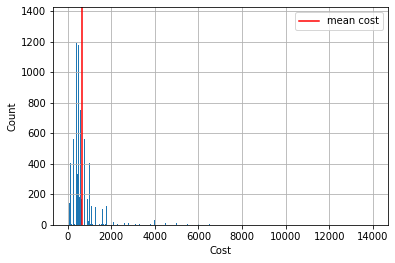

In [9]:
cost=train["COST"].hist(bins=500)
mean_cost=np.mean(train["COST"])
plt.axvline(mean_cost, color="red", label="mean cost")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.legend()
plt.show()

In [10]:
train.TITLE.value_counts().nunique()

50

In [11]:
train.groupby("TITLE")["COST"].aggregate(["mean", "median", max, min, "count", "std"])

mean  median   max  min  count         std
TITLE                                                                      
BAKERY                     353.921488     300  1400  100    242  171.082464
BAKERY,BEVERAGE SHOP       200.000000     200   200  200      1         NaN
BAKERY,CAFÉ                658.333333     600  1400  300     12  315.388169
BAKERY,CONFECTIONERY       400.000000     400   400  400      1         NaN
BAKERY,DESSERT PARLOR      380.392157     300  1500  150     51  250.814360
...                               ...     ...   ...  ...    ...         ...
SWEET SHOP,BEVERAGE SHOP   200.000000     200   200  200      1         NaN
SWEET SHOP,CASUAL DINING   400.000000     400   500  300      2  141.421356
SWEET SHOP,CONFECTIONERY   500.000000     500   500  500      1         NaN
SWEET SHOP,DESSERT PARLOR  300.000000     275   500  150      4  147.196014
SWEET SHOP,QUICK BITES     298.913043     300   700  150     46  131.017018

[111 rows x 6 columns]

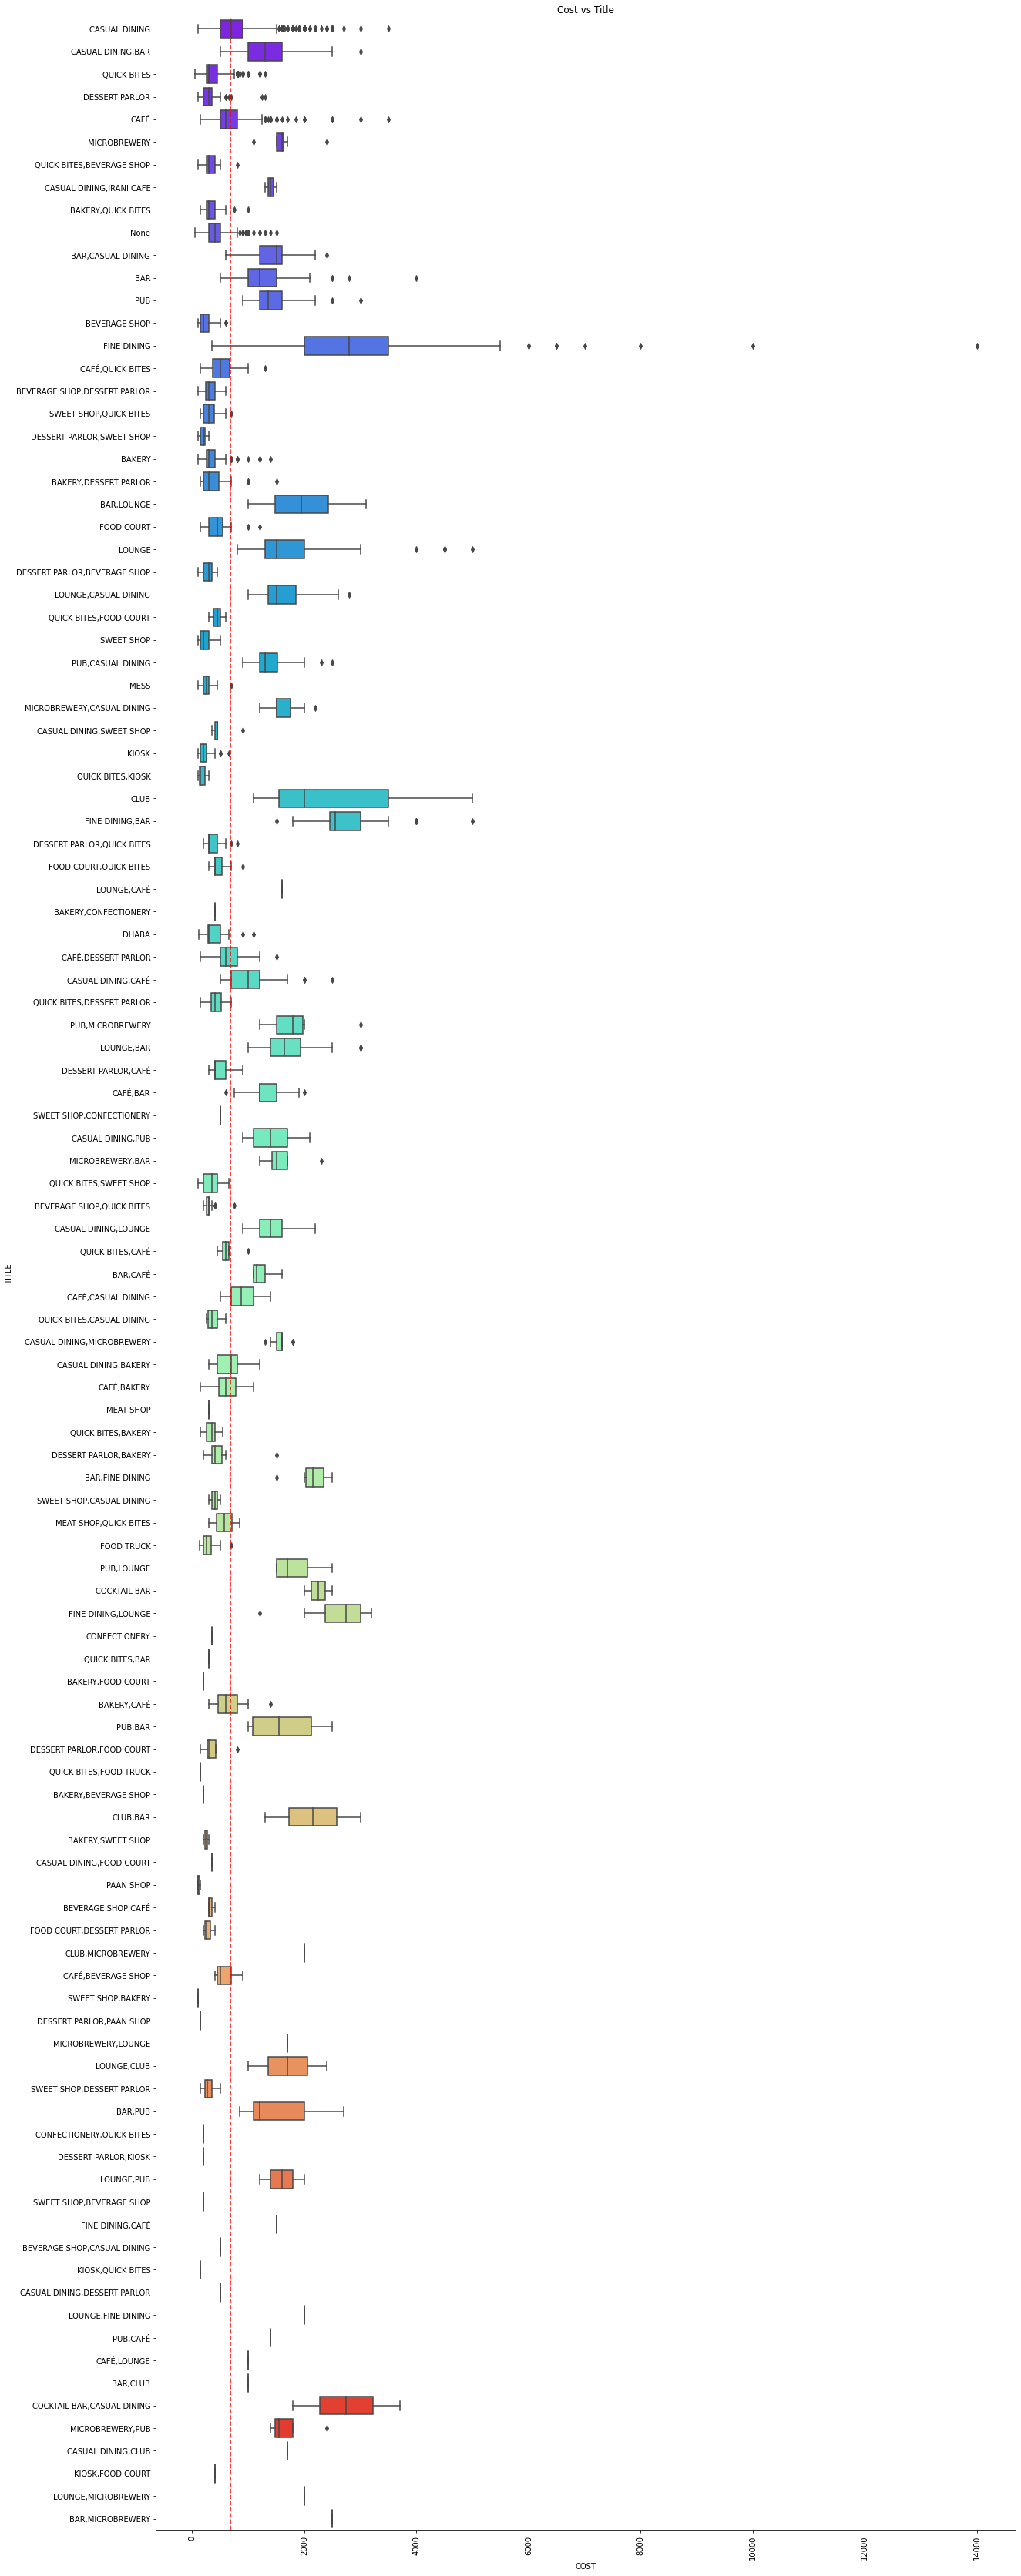

In [13]:
import seaborn as sns
plt.figure(figsize=(20,60))
mean_cost=np.mean(train["COST"])
sns.boxplot(x="COST", y="TITLE", data=train, palette="rainbow")
plt.axvline(mean_cost, color="red", linestyle="dashed")
plt.title("Cost vs Title")
plt.xticks(rotation="vertical")
plt.show()

In [14]:
train.CUISINES.value_counts().nunique()

68

In [15]:
train.groupby("TITLE")["COST"].aggregate(["mean", "median", max, min, "count", "std"])

mean  median   max  min  count         std
TITLE                                                                      
BAKERY                     353.921488     300  1400  100    242  171.082464
BAKERY,BEVERAGE SHOP       200.000000     200   200  200      1         NaN
BAKERY,CAFÉ                658.333333     600  1400  300     12  315.388169
BAKERY,CONFECTIONERY       400.000000     400   400  400      1         NaN
BAKERY,DESSERT PARLOR      380.392157     300  1500  150     51  250.814360
...                               ...     ...   ...  ...    ...         ...
SWEET SHOP,BEVERAGE SHOP   200.000000     200   200  200      1         NaN
SWEET SHOP,CASUAL DINING   400.000000     400   500  300      2  141.421356
SWEET SHOP,CONFECTIONERY   500.000000     500   500  500      1         NaN
SWEET SHOP,DESSERT PARLOR  300.000000     275   500  150      4  147.196014
SWEET SHOP,QUICK BITES     298.913043     300   700  150     46  131.017018

[111 rows x 6 columns]

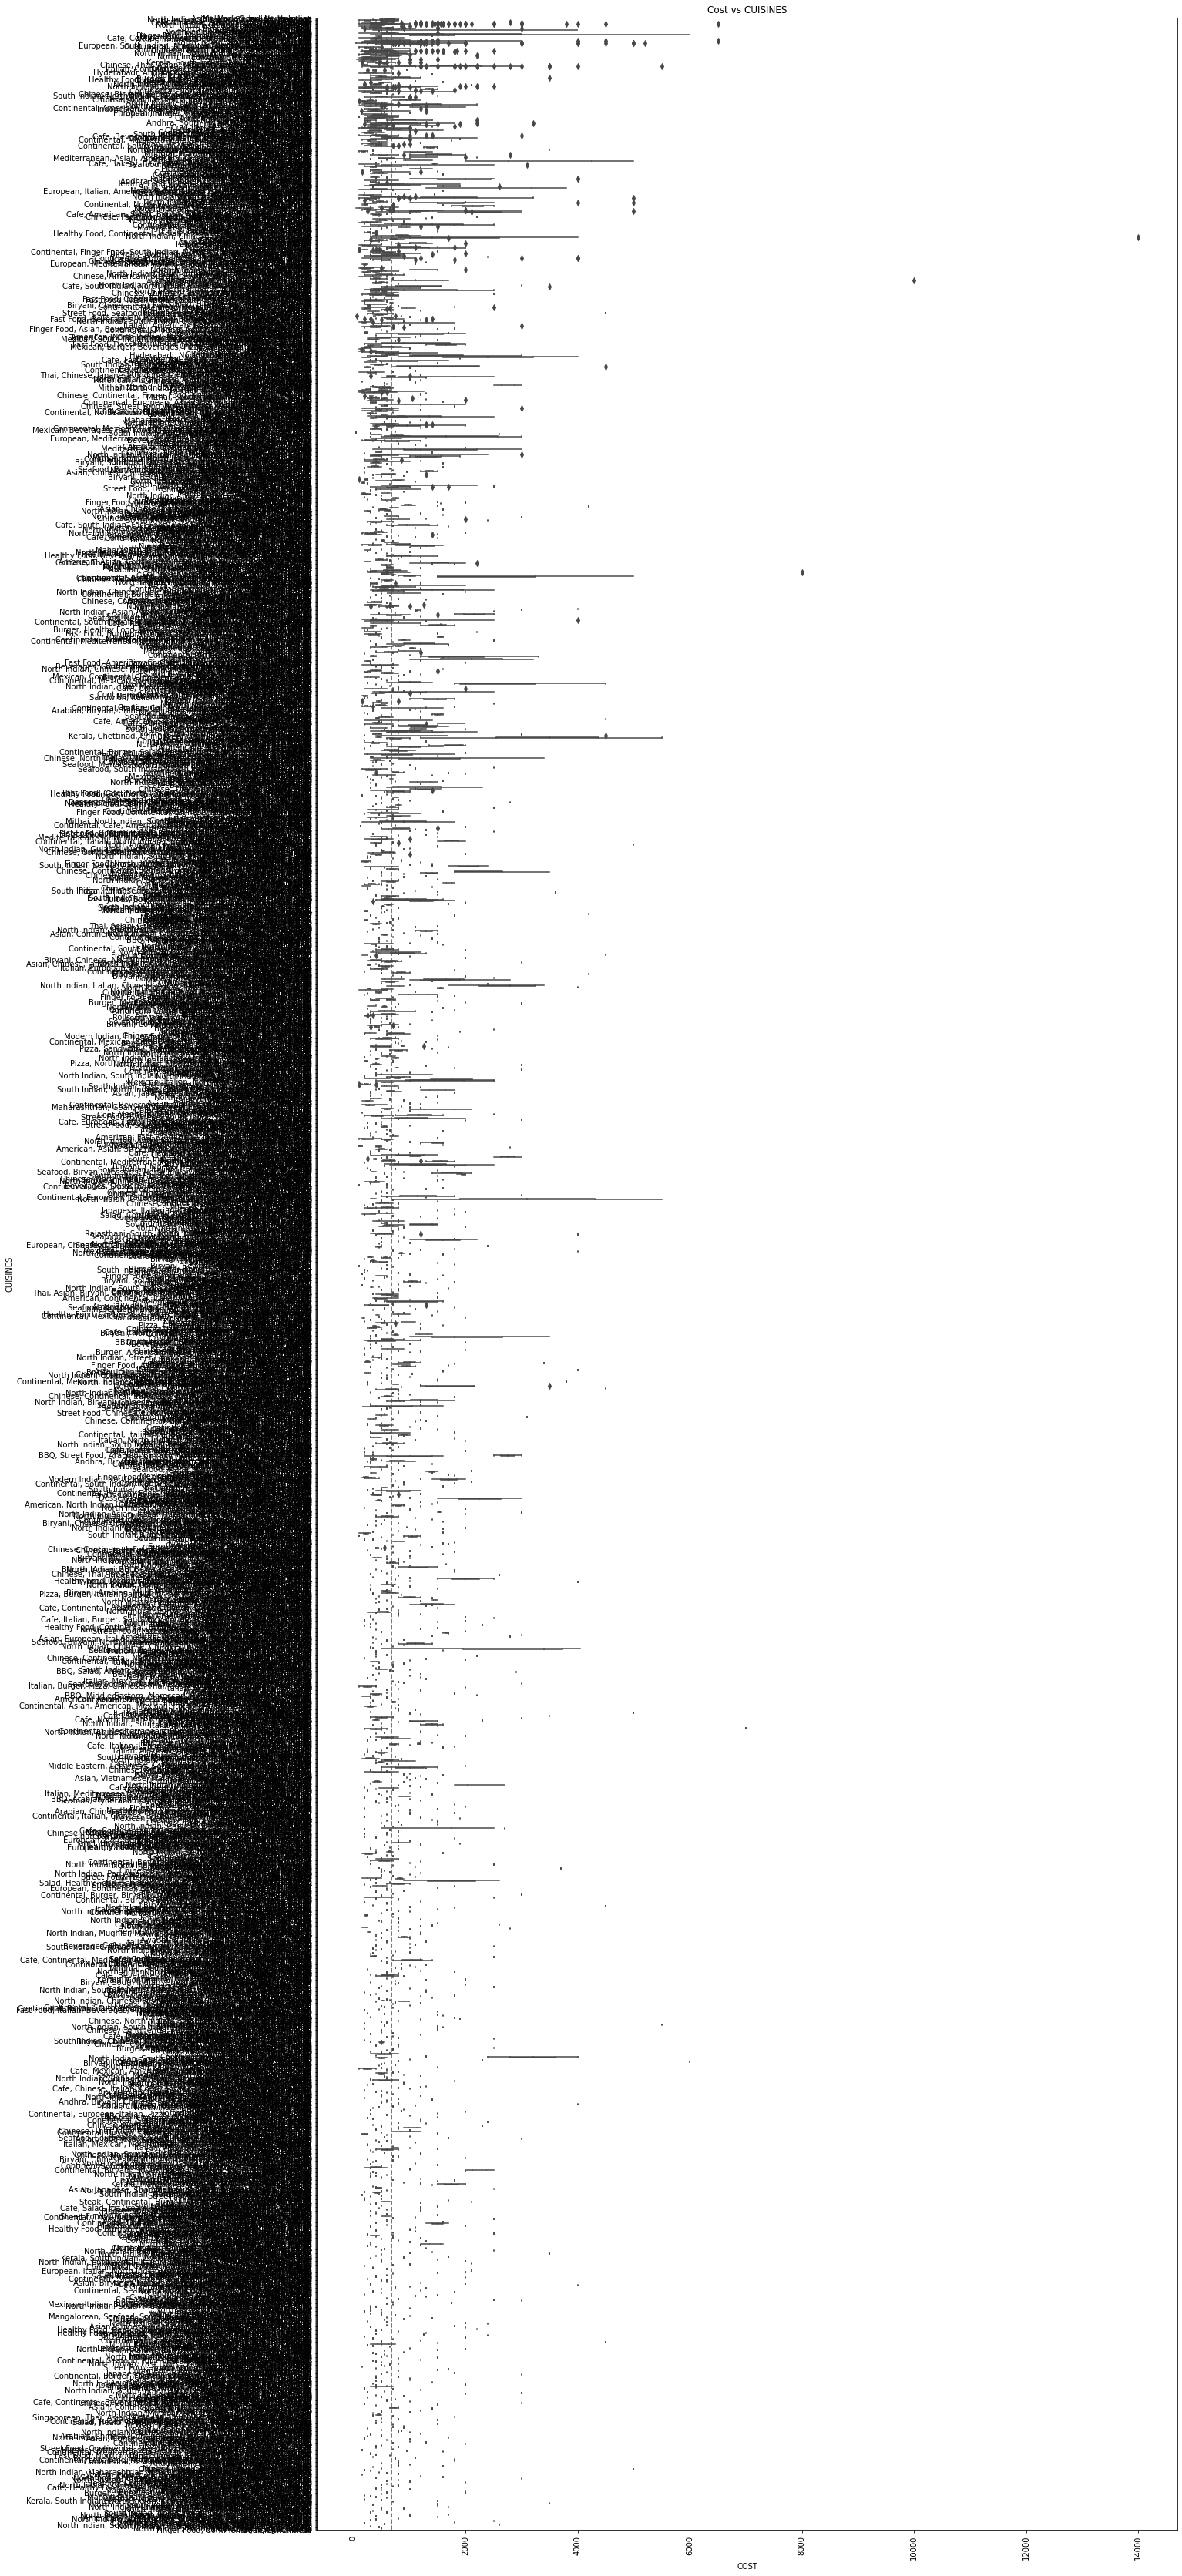

In [17]:
plt.figure(figsize=(20,60))
mean_cost=np.mean(train["COST"])
sns.boxplot(x="COST", y="CUISINES", data=train, palette="rainbow")
plt.axvline(mean_cost, color="red", linestyle="dashed")
plt.title("Cost vs CUISINES")
plt.xticks(rotation="vertical")
plt.show()

In [38]:
train.CITY.value_counts().nunique()

28

In [44]:
train.groupby("CITY")["COST"].aggregate(["mean", "median", max, min, "count", "std"])

mean  median   max  \
CITY                                                                       
10th avenue                                          300.0     300   300   
1st Stage                                            200.0     200   200   
1st Tavarekere                                       400.0     400   400   
3rd Street                                          1200.0    1200  1200   
5th Main Teachers Colony Koramangala Block 1 Ba...   200.0     200   200   
...                                                    ...     ...   ...   
navi mumbai                                         1600.0    1600  1600   
opp gurudwara Shakurpur                              100.0     100   100   
opp mukteshwar ashram powai                          800.0     800   800   
p.o Kochi                                            350.0     350   400   
ward X11                                             100.0     100   100   

                                                     min  count        std  
CITY                                                                        
10th avenue                                          300      1        NaN  
1st Stage                                            200      1        NaN  
1st Tavarekere                                       400      1        NaN  
3rd Street                                          1200      1        NaN  
5th Main Teachers Colony Koramangala Block 1 Ba...   200      1        NaN  
...                                                  ...    ...        ...  
navi mumbai                                         1600      1        NaN  
opp gurudwara Shakurpur                              100      1        NaN  
opp mukteshwar ashram powai                          800      1        NaN  
p.o Kochi                                            300      2  70.710678  
ward X11                                             100      1        NaN  

[336 rows x 6 columns]

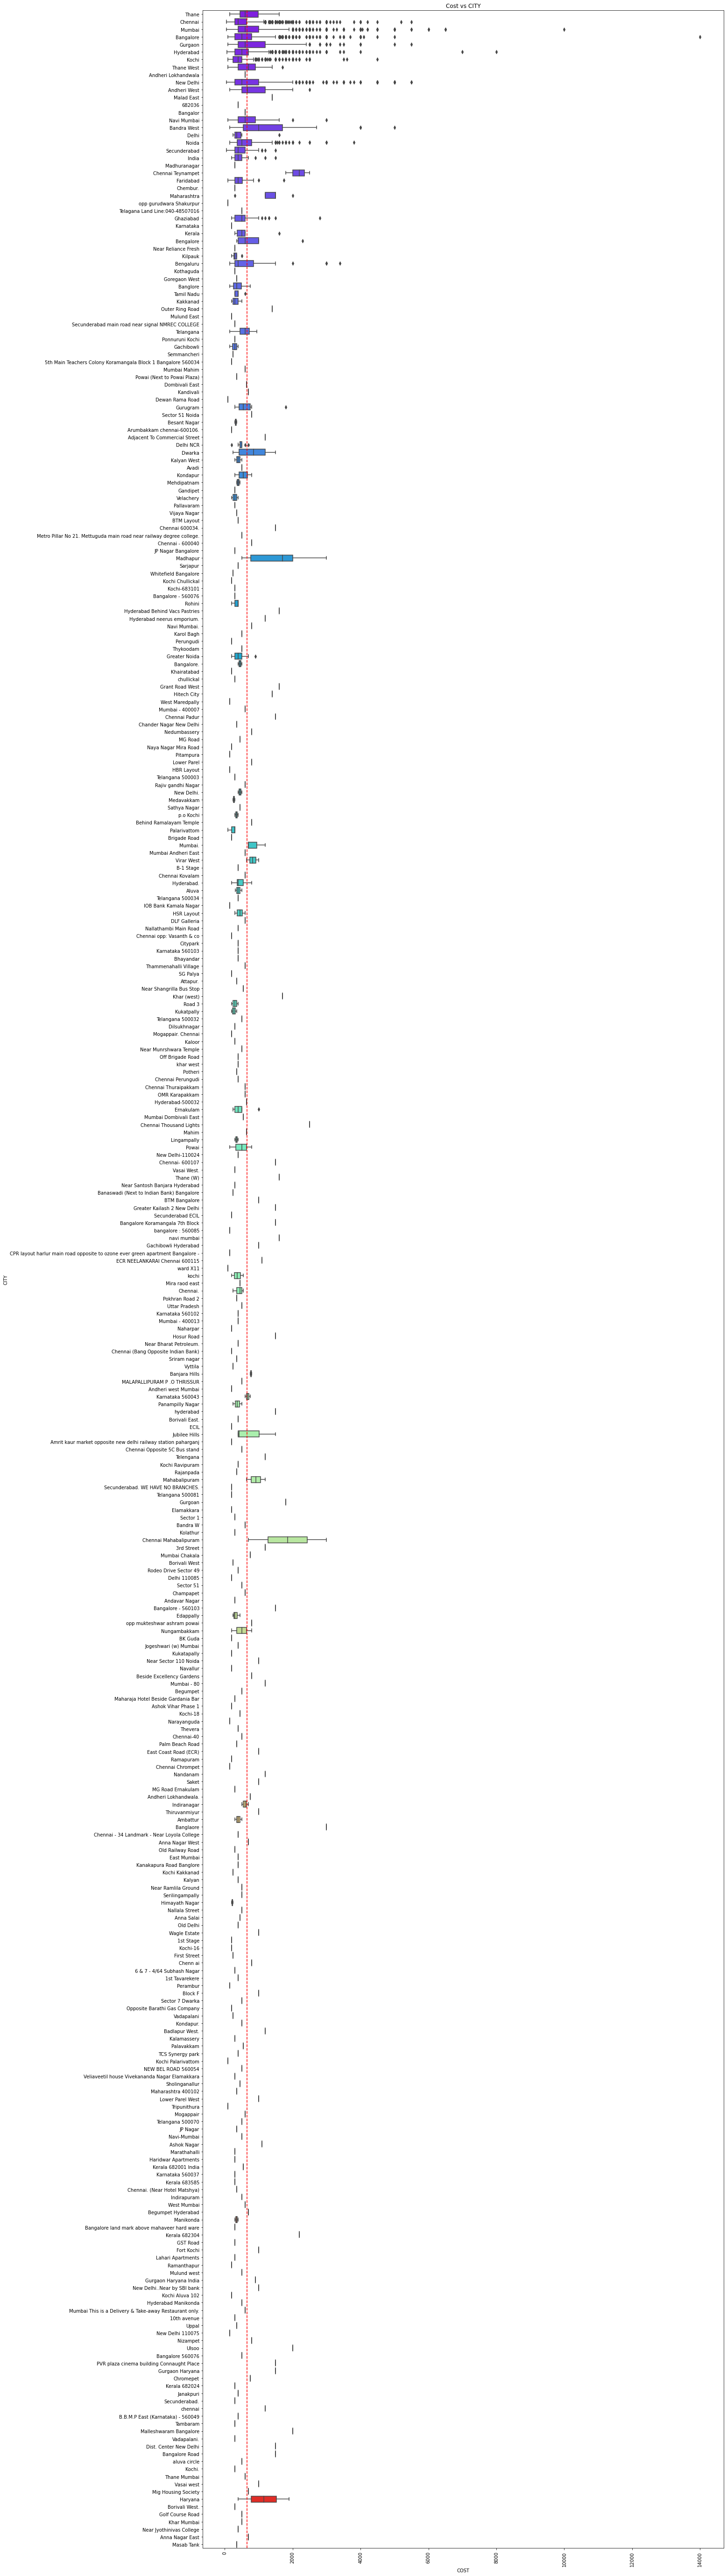

In [40]:
plt.figure(figsize=(20,100))
mean_cost=np.mean(train["COST"])
sns.boxplot(x="COST", y="CITY", data=train, palette="rainbow")
plt.axvline(mean_cost, color="red", linestyle="dashed")
plt.title("Cost vs CITY")
plt.xticks(rotation="vertical")
plt.show()

In [43]:
train.LOCALITY.value_counts().nunique()

74

In [45]:
train.groupby("LOCALITY")["COST"].aggregate(["mean", "median", max, min, "count", "std"])

mean  median   max   min  count  std
LOCALITY                                                                 
(Main Market) Mayur Vihar Phase 2   200.0     200   200   200      1  NaN
1 st Cross street                   300.0     300   300   300      1  NaN
1-7-172/1 Ecil Opposite             150.0     150   150   150      1  NaN
100 Ft Road                         400.0     400   400   400      1  NaN
110009                              500.0     500   500   500      1  NaN
...                                   ...     ...   ...   ...    ...  ...
nungambakkam                       1200.0    1200  1200  1200      1  NaN
perungudi                          1500.0    1500  1500  1500      1  NaN
rajendra nagar                      400.0     400   400   400      1  NaN
seawoods grand central mall        1600.0    1600  1600  1600      1  NaN
shop no. 3 Sector 22                200.0     200   200   200      1  NaN

[1311 rows x 6 columns]

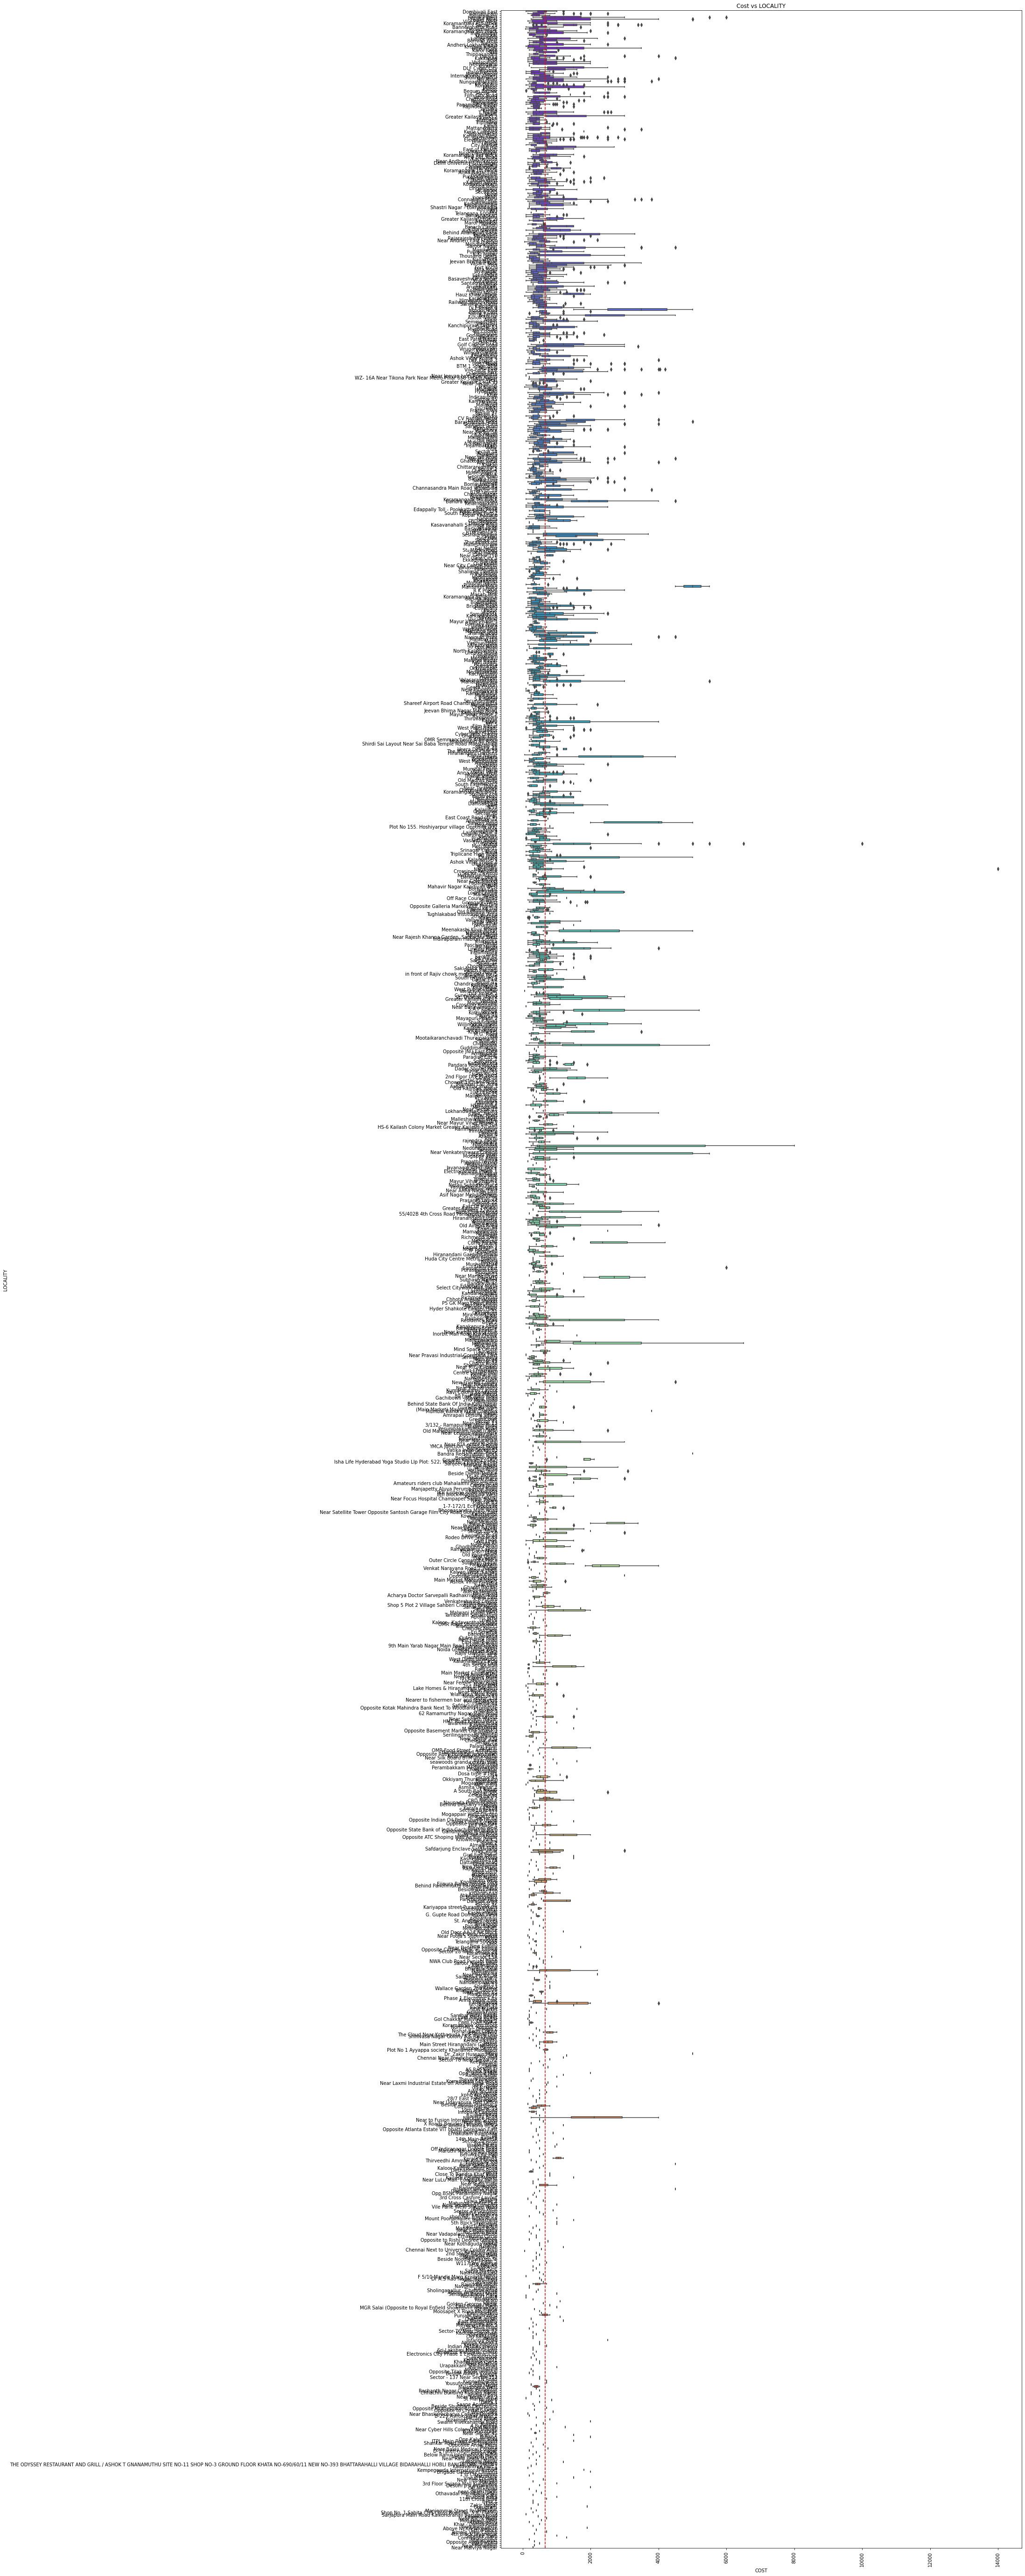

In [51]:
plt.figure(figsize=(20,100))
mean_cost=np.mean(train["COST"])
sns.boxplot(x="COST", y="LOCALITY", data=train, palette="rainbow")
plt.axvline(mean_cost, color="red", linestyle="dashed")
plt.title("Cost vs LOCALITY")
plt.xticks(rotation="vertical")
plt.show()

In [46]:
train.RATING.value_counts().nunique()

29

In [52]:
train["RATING"]=train.RATING.astype("float")
train.RATING.dtype

dtype('float64')

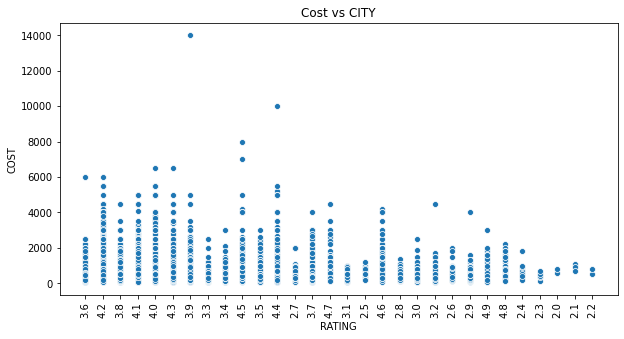

In [54]:
plt.figure(figsize=(10,5))
mean_cost=np.mean(train["COST"])
sns.scatterplot(x="RATING", y="COST", data=train, palette="rainbow")
plt.title("Cost vs Rating")
plt.xticks(rotation="vertical")
plt.show()

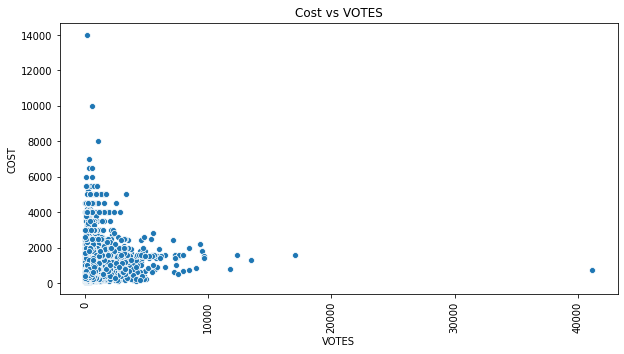

In [55]:
plt.figure(figsize=(10,5))
mean_cost=np.mean(train["COST"])
sns.scatterplot(x="VOTES", y="COST", data=train, palette="rainbow")
plt.title("Cost vs VOTES")
plt.xticks(rotation="vertical")
plt.show()

In [18]:
train.drop(columns="TIME", inplace=True)
train.columns

Index(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST'], dtype='object')

In [34]:
test.drop(columns="TIME", inplace=True)
test.columns

KeyError: "['TIME'] not found in axis"

In [40]:
test.head()
test.CITY.astype("str")

RESTAURANT_ID
4085           Noida
12680         Mumbai
1411          Mumbai
204        Faridabad
13453          Kochi
            ...     
9057       New Delhi
1247       Bangalore
8617       Faridabad
6485           Kochi
2421     Bandra West
Name: CITY, Length: 4231, dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train["TITLE"])
train["TITLE"]=le.fit_transform(train["TITLE"])

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train["CUISINES"])
train["CUISINES"]=le.fit_transform(train["CUISINES"])

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train["CITY"])
train["CITY"]=le.fit_transform(train["CITY"])

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train["LOCALITY"])
train["LOCALITY"]=le.fit_transform(train["LOCALITY"])

In [53]:
train.head()

TITLE  CUISINES  CITY  LOCALITY  RATING  VOTES  COST
RESTAURANT_ID                                                      
9438              29      2463   300       267     3.6     49  1200
13198             31       275    63       961     4.2     30  1500
10915             29      2800    63      1015     3.8    221   800
6346              93      3893   206       128     4.1     24   800
15387             48      1663   206       573     3.8    165   300

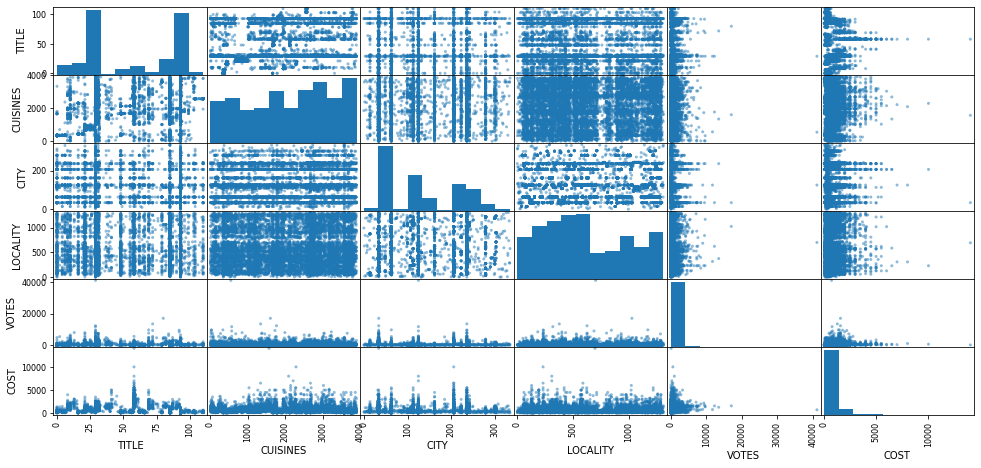

In [25]:
scatter_matrix(train, figsize=(16.5,7.5))
plt.show()

In [54]:
corrmat=train.corr()

<AxesSubplot:>

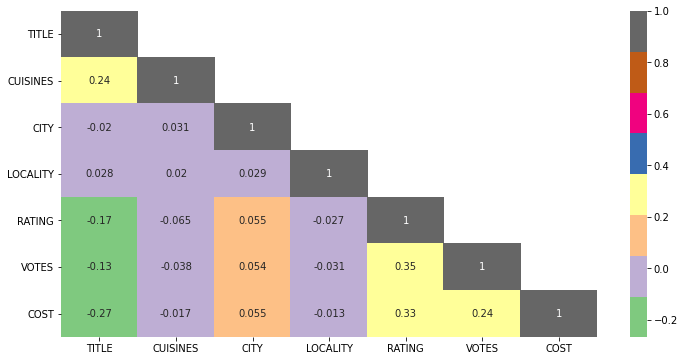

In [55]:
plt.figure(figsize=(12,6))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)

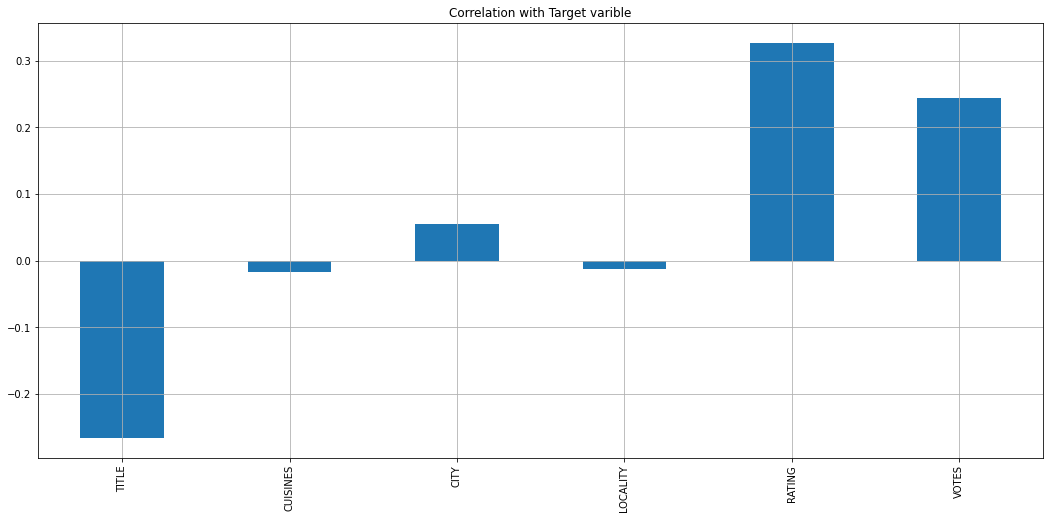

In [56]:
#corelation of preidictors with target varible
plt.figure(figsize=(18,8))
train.drop("COST",axis=1).corrwith(train["COST"]).plot(kind="bar", grid=True)
plt.xticks(rotation="vertical")
plt.title("Correlation with Target varible")
plt.show()

In [57]:
#to handle the outliers
from scipy.stats import zscore
z=abs(zscore(train))
train_mod=train[(z<3).all(axis=1)]

In [58]:
train.shape, train_mod.shape

((11393, 7), (10936, 7))

In [59]:
X=train.drop(columns="COST")
y=train.COST

In [60]:
#to handle the skewness
X.skew()
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [61]:
X.skew()

TITLE       0.005770
CUISINES   -0.210773
CITY        0.294861
LOCALITY    0.335364
RATING     -0.517737
VOTES      -0.000152
dtype: float64

In [62]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X)
X_mod=pd.DataFrame(X_, columns=X.columns)

In [63]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score,roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [66]:
model=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

In [67]:
for m in model:
    m.fit(X_train, y_train)
    score=m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("For Model:", m,"Score:", score)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean_Absolute Error", mean_absolute_error(y_test, y_pred))
    print("Mean_Squared_error:", np.sqrt(y_test, y_pred))

For Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Score: 0.18480243171281374
R2 Score: 0.18182935578003556
Mean_Absolute Error 339.4137473783682
Mean_Squared_error: RESTAURANT_ID
10574    22.360680
8795     28.284271
9010     17.320508
1180     14.142136
201      37.416574
           ...    
1212     33.166248
2611     12.247449
5861     15.811388
9771     28.284271
9459     22.360680
Name: COST, Length: 2279, dtype: float64
For Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Score: 0.18480243068906832
R2 Score: 0.18182895400053511
Mean_Absolute Error 339.4124999492779
Mean_Squared_error: RESTAURANT_ID
10574    22.360680
8795     28.284271
9010     17.320508
1180     14.142136
201      37.416574
           ...    
1212     33.166248
2611     12.247449
5861     15.811388
9771     28.284271
9459     22.360680
Name: COST, Length: 2279, dtype: float64
For Mod

In [68]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,X_mod,y, cv=10, scoring="r2")
    print("For Model:", m,"Score:", score)
    print("Mean Score:", score.mean())
    print("Std", score.std())    

For Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Score: [0.21660498 0.12890816 0.15275928 0.20207029 0.1787206  0.21351251
 0.18033332 0.18371561 0.21527552 0.19783638]
Mean Score: 0.18697366636366092
Std 0.02719241875173784
For Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Score: [0.21660562 0.12890893 0.15275941 0.20206934 0.17872288 0.21351351
 0.18033395 0.18371516 0.21527467 0.19783452]
Mean Score: 0.18697379918803805
Std 0.027192109656681267
For Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Score: [0.21649628 0.12892513 0.1528074  0.20216194 0.17903445 0.21342831
 0.18050978 0.18351193 0.21541249 0.19759281]
Mean Score: 0.18698805277846614
Std 0.027161389210427125
For Model: ElasticNet(alpha

In [69]:
print("Observation: Random Forest Rgressor is giving highest score and r2 score.")

Observation: Random Forest Rgressor is giving highest score and r2 score.


In [70]:
from sklearn.model_selection import GridSearchCV
param_grid={"random_state": range(42,200)}
clf=GridSearchCV(RandomForestRegressor(), param_grid)
clf.fit(X_train,y_train)
clf.best_params_

{'random_state': 143}

In [ ]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=92, test_size=.2)
final_model=RandomForestRegressor()
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)
y_pred=final_model.predict(X_test)
print("for Model",final_model , "Accuracy Score:", r2_score(y_test,y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))